In [ ]:
import tensorflow as tf
print("TF version:",tf.__version__)
import tensorflow_hub as hub
print("TF hub version",hub.__version__)

TF version: 2.3.0
TF hub version 0.8.0


In [ ]:
print("GPU","Available" if tf.config.list_physical_devices("GPU") else "Not Availabe")

GPU Available


In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
import os 
import numpy as np
np.random.seed(777)
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import keras.backend as k

from keras.optimizers import Adam
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import np_utils
from keras.utils import plot_model

In [ ]:
train_dir = '/content/drive/My Drive/Flowers/train'
test_dir = '/content/drive/My Drive/Flowers/test'

In [ ]:
for root,dirs,files in os.walk(train_dir):
    print (root, len(files))
print("*"*50)
for root,dirs,files in os.walk(test_dir):
    print (root, len(files))

/content/drive/My Drive/Flowers/train 0
/content/drive/My Drive/Flowers/train/snowdrop 70
/content/drive/My Drive/Flowers/train/iris 70
/content/drive/My Drive/Flowers/train/tigerlily 70
/content/drive/My Drive/Flowers/train/tulip 70
/content/drive/My Drive/Flowers/train/fritillary 70
/content/drive/My Drive/Flowers/train/windflower 70
/content/drive/My Drive/Flowers/train/sunflower 70
/content/drive/My Drive/Flowers/train/lily_valley 70
/content/drive/My Drive/Flowers/train/dandelion 70
/content/drive/My Drive/Flowers/train/pansy 70
/content/drive/My Drive/Flowers/train/colts_foot 70
/content/drive/My Drive/Flowers/train/daffodil 70
/content/drive/My Drive/Flowers/train/daisy 70
/content/drive/My Drive/Flowers/train/crocus 70
/content/drive/My Drive/Flowers/train/buttercup 70
/content/drive/My Drive/Flowers/train/cowslip 70
/content/drive/My Drive/Flowers/train/bluebell 70
**************************************************
/content/drive/My Drive/Flowers/test 0
/content/drive/My Drive

In [ ]:
output_classes = 17
batch_size = 16
img_height, img_width = 224,224
input_shape = (img_height, img_width, 3)
epochs = 10
nb_train_samples = 1190
nb_test_samples = 170

In [ ]:

random_seed = np.random.seed(1142)
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    featurewise_std_normalization=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = True,
    class_mode='categorical')


test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = False,
    class_mode='categorical')

Found 1190 images belonging to 17 classes.
Found 170 images belonging to 17 classes.


In [ ]:
from keras.models import Sequential
model = Sequential()

model.add(VGG16(weights = "imagenet", include_top=False, pooling = 'avg'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=output_classes, activation='softmax'))
adam_opt = Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-5)

model.layers[0].trainable = True

In [ ]:
model.compile(optimizer= adam_opt,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 17)                8721      
Total params: 14,723,409
Trainable params: 14,723,409
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit_generator(
  train_generator,
  steps_per_epoch = nb_train_samples // batch_size,
  epochs = epochs,
  validation_data = test_generator,
  validation_steps = nb_test_samples // batch_size)

Epoch 1/10
74/74 [==============================] - 31s 423ms/step - loss: 2.9784 - accuracy: 0.0980 - val_loss: 2.2444 - val_accuracy: 0.3812
Epoch 2/10
74/74 [==============================] - 32s 426ms/step - loss: 2.0059 - accuracy: 0.3560 - val_loss: 1.1293 - val_accuracy: 0.6812
Epoch 3/10
74/74 [==============================] - 32s 427ms/step - loss: 1.1685 - accuracy: 0.6227 - val_loss: 0.7798 - val_accuracy: 0.7812
Epoch 4/10
74/74 [==============================] - 32s 427ms/step - loss: 0.8658 - accuracy: 0.7334 - val_loss: 0.7574 - val_accuracy: 0.8062
Epoch 5/10
74/74 [==============================] - 32s 427ms/step - loss: 0.6492 - accuracy: 0.7913 - val_loss: 0.5024 - val_accuracy: 0.8562
Epoch 6/10
74/74 [==============================] - 32s 427ms/step - loss: 0.5006 - accuracy: 0.8467 - val_loss: 0.7085 - val_accuracy: 0.8250
Epoch 7/10
74/74 [==============================] - 32s 427ms/step - loss: 0.3968 - accuracy: 0.8756 - val_loss: 0.6702 - val_accuracy: 0.8438

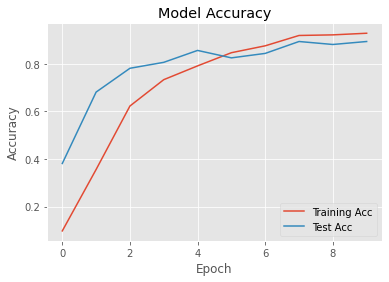

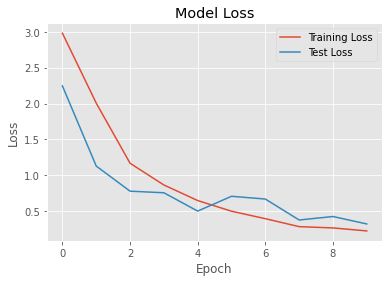

In [ ]:
plt.style.use("ggplot")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Acc', 'Test Acc'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Test Loss'], loc='upper right')
plt.show()

In [ ]:
filename = test_generator.filenames
truth = test_generator.classes
label = test_generator.class_indices
indexlabel = dict((value, key) for key, value in label.items())

predicts = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size, verbose=1)
predict_class = np.argmax(predicts, axis=1)
errors = np.where(predict_class != truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))

Instructions for updating:
Please use Model.predict, which supports generators.
11/10 [===============================] - 3s 274ms/step
No of errors = 17/170


Confusion Matrix
[[ 6  0  0  0  2  0  0  0  0  1  0  1  0  0  0  0  0]
 [ 0  9  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  2  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  9  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  6  0  1  0  0  0  2]
 [ 0  1  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10]]


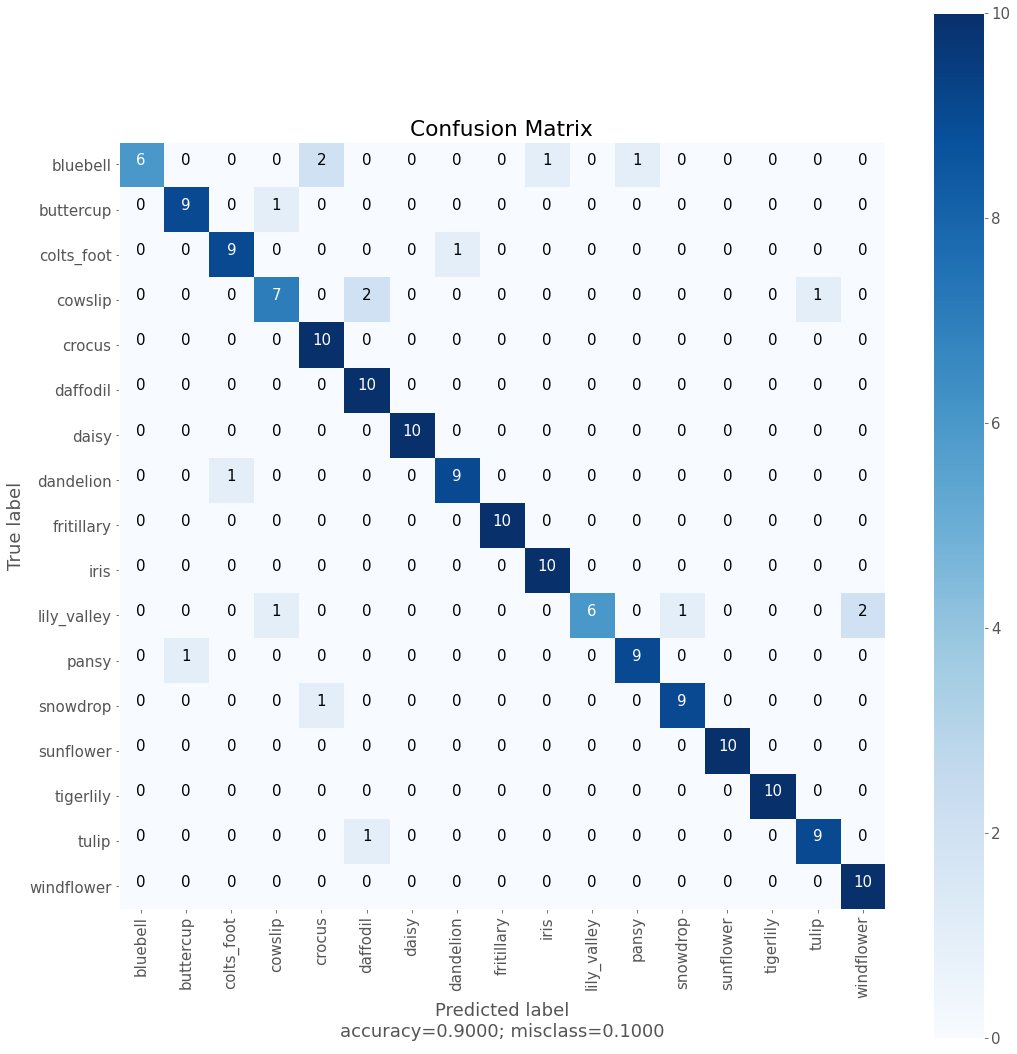

In [ ]:
plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 15})

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(truth,predict_class)

labels = []
for k,v in indexlabel.items():
    labels.append(v)
    
import itertools
def plot_confusion_matrix(cm, classes,
                         c
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix')

    print(cm)
#     fig = plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass)) 
    plt.figure(figsize=(15,15))


plot_confusion_matrix(cm, classes=labels,
                      title='Confusion Matrix')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
y_pred = predicts
y_pred_probabilities=y_pred

y_pred = np.argmax(y_pred,axis = 1) 
y_actual = test_generator.classes

classnames=[]
for classname in test_generator.class_indices:
    classnames.append(classname)


target_names = classnames
print(classification_report(y_actual, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    bluebell       1.00      0.60      0.75        10
   buttercup       0.90      0.90      0.90        10
  colts_foot       0.90      0.90      0.90        10
     cowslip       0.78      0.70      0.74        10
      crocus       0.77      1.00      0.87        10
    daffodil       0.77      1.00      0.87        10
       daisy       1.00      1.00      1.00        10
   dandelion       0.90      0.90      0.90        10
  fritillary       1.00      1.00      1.00        10
        iris       0.91      1.00      0.95        10
 lily_valley       1.00      0.60      0.75        10
       pansy       0.90      0.90      0.90        10
    snowdrop       0.90      0.90      0.90        10
   sunflower       1.00      1.00      1.00        10
   tigerlily       1.00      1.00      1.00        10
       tulip       0.90      0.90      0.90        10
  windflower       0.83      1.00      0.91        10

    accuracy              

In [ ]:
model.save('/content/drive/My Drive/Spinach model/VGG16-Flowers-model.h5')
model.save_weights('/content/drive/My Drive/Spinach model/VGG16-Flowers-Weights.h5')